###### Finding ways to mathematically analyze textual data is the main goal of the field known as natural language processing (NLP).

## Using NLP to Detect Plagirism

NLP tools that can detect not only exact text matches but also “loose” or “fuzzy” matches based on the meanings of similar words and sentences. 
- For example, we’ll need a method that can identify that trouble and problem are similar words used roughly as synonyms in the student’s paraphrase. 

By identifying synonyms and near-synonyms, we’ll be able determine which non-identical sentences are similar enough to each other to constitute evidence for plagiarism. 

We’ll use an NLP model called word2vec to accomplish this.

## Understanding the word2vec NLP model

"We’ll use data that comes from a large collection of natural language text, also called a corpus. A corpus may be a collection of books, newspaper articles, research papers, theatrical plays, or blog posts or a mix of these. The important point is that it consists of natural language—phrases and sentences that were put together by humans and reflect the way humans speak and write. Once we have our natural language corpus, we can look at how to use it to quantify the meanings of words.”

#### Quantifyng Similarities Between Words

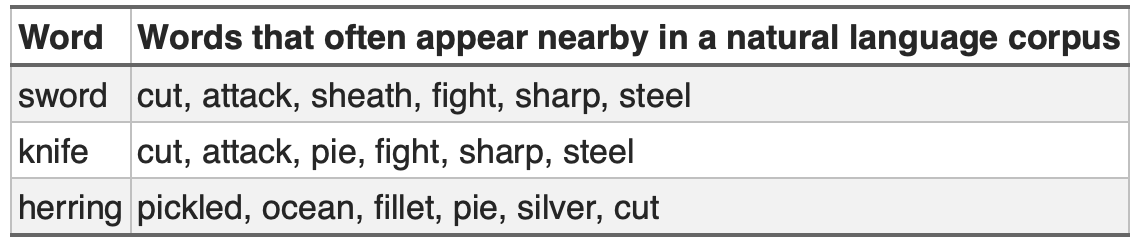

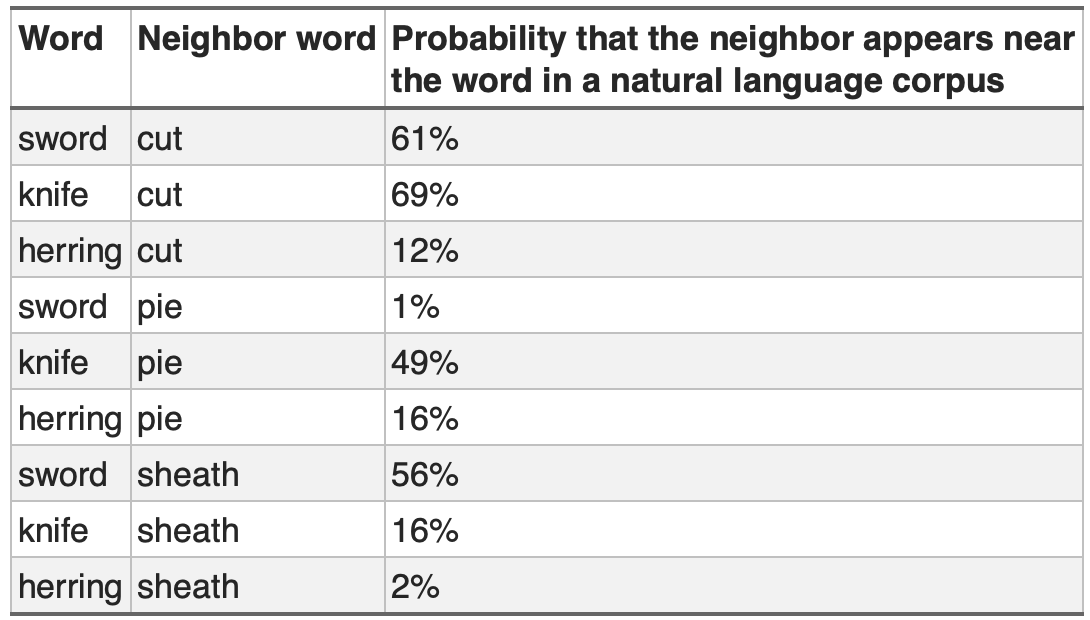

#### Creating a System of Equations

Word: sword, Neighbor word: cut

61 = 5 · 10 – 5 · 1 + 3 · 5 + 1 · 1

-> 61 = (5, –5, 3, 1) · (10, 1, 5, 1)

-> 61 = 5 · 10 + (–5) · 1 + 3 · 5 + 1 · 1

<br>
Word: herring, Neighbor word: cut

12 = (5, –5, 3, 1) · (2, 2, 2, 6)

<br>
Rewriting known arithmetic facts:

sword = (10, 1, 5, 1)

herring = (2, 2 ,2, 6)

Probability that cut appears near a word = (5, –5, 3, 1) · the word’s vector

60 = (5, –5, 3, 1) · (10, 1, 5, 9)

1 = (1, –10, –1, 6) · (10, 1, 5, 1)

49 = (1, –10, –1, 6) · (2, 2, 2, 6)

16 = (1, –10, –1, 6) · (10, 1, 5, 9)

56 = (1, 6, 9, –5) · (10, 1, 5, 1)

16 = (1, 6, 9, –5) · (2, 2, 2, 6)

2 = (1, 6, 9, –5) · (10, 1, 5, 9)


sword = (10, 1, 5, 1)

knife = (10, 1 , 5, 9)

herring = (2, 2, 2, 6)

Probability that cut appears near a word = (5, –5, 3, 1) · the word’s vector

Probability that pie appears near a word = (1, –10, –1, 6) · the word’s vector

Probability that sheath appears near a word = (1, 6, 9, –5) · the word’s vector

In [1]:
sword = [10,1,5,1]
knife = [10,1,5,9]
herring = [2,2,2,6]

In [2]:
import numpy as np
def euclidean(vec1,vec2):
    distance=np.array(vec1)-np.array(vec2)
    squared_sum=np.sum(distance**2)
    return np.sqrt(squared_sum)

Euclidean distance is the length of the hypotenuse of a right triangle, which we can calculate with the Pythagorean theorem. 
- More informally, we often refer to the Euclidean distance as just distance. 

In more than two dimensions, we use the same Pythagorean theorem formula to calculate a Euclidean distance, and the only difference is that it’s harder to draw. 

Calculating Euclidean distances between vectors is a reasonable way to calculate the similarity of two vectors: <br>
-> the closer the Euclidean distance between the vectors, the more similar they are.

In [3]:
print(euclidean(sword,knife))
print(euclidean(sword,herring))
print(euclidean(knife,herring))

8.0
9.9498743710662
9.1104335791443


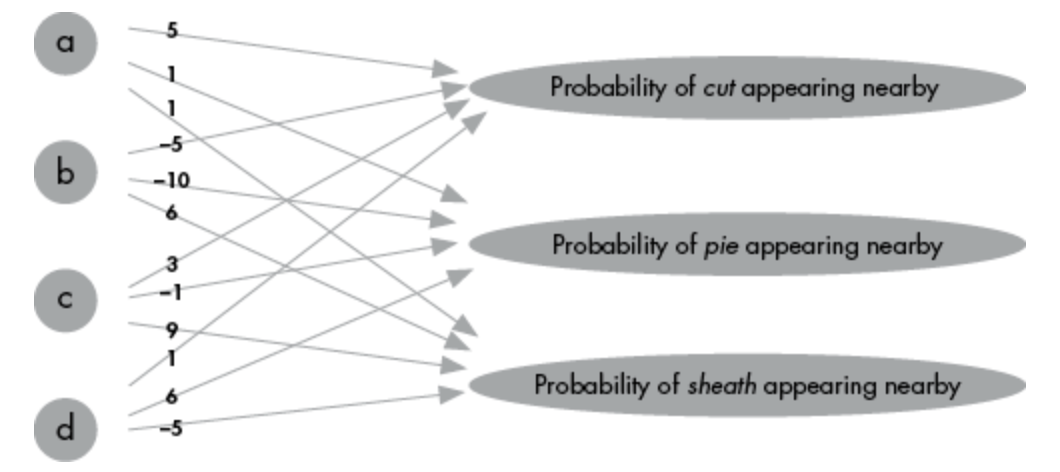

word 'cut': 5*a - 5*b + 3*c + 1*d

word2vec model: create a table of probabilities for every word in a corpus, use that table to set up a neural network, and then train that neural network to find numeric vectors that represent every word

## Analyzing Numeric Vectors in word2vec

In [4]:
import gensim.downloader as api

In [5]:
vectors=api.load('word2vec-google-news-300')

In [6]:
print(vectors['sword'])

[ 0.51953125  0.1875      0.31445312 -0.20605469 -0.0078125   0.375
  0.22558594 -0.02441406 -0.06445312  0.27929688  0.02746582 -0.24511719
 -0.21582031  0.13574219 -0.27148438 -0.09130859 -0.06884766 -0.08349609
  0.14160156 -0.14160156  0.24316406 -0.23730469  0.32421875 -0.00582886
 -0.12792969  0.0201416   0.07617188 -0.10742188  0.16894531 -0.12988281
  0.07958984  0.2265625   0.11035156  0.12792969  0.02856445  0.01965332
 -0.06933594  0.21875    -0.06738281 -0.04370117  0.23046875  0.07714844
  0.49804688 -0.14550781  0.23632812 -0.10009766  0.02893066 -0.16699219
  0.09814453 -0.24804688 -0.09082031  0.3515625  -0.00439453 -0.29296875
  0.00793457 -0.140625   -0.10888672  0.00212097 -0.13476562 -0.02575684
 -0.02148438  0.10888672  0.07324219  0.15332031 -0.06835938 -0.01831055
  0.08544922 -0.39257812  0.03979492  0.12890625  0.10595703 -0.13476562
  0.05224609 -0.25       -0.16113281 -0.11523438  0.00117493 -0.17480469
  0.04248047 -0.42382812  0.03710938 -0.02770996 -0.0644

word vectors - also called embeddings bc embedded a word in a vector space; converted a word to a vector of numbers

In [7]:
print(euclidean(vectors['sword'],vectors['knife']))
print(euclidean(vectors['sword'],vectors['herring']))
print(euclidean(vectors['car'],vectors['van']))

3.2766972
4.9384727
2.608656


In [8]:
def dot_product(vector1,vector2):
    thedotproduct=np.sum([vector1[k]*vector2[k] for k in range(0,len(vector1))])
    return(thedotproduct)

def vector_norm(vector):
    thenorm=np.sqrt(dot_product(vector,vector))
    return(thenorm)

def cosine_similarity(vector1,vector2):
    thecosine=0
    thedotproduct=dot_product(vector1,vector2)
    thecosine=thedotproduct/(vector_norm(vector1)*vector_norm(vector2))
    thecosine=np.round(thecosine,4)
    return(thecosine)

In [9]:
print(cosine_similarity(vectors['sword'],vectors['knife']))
print(cosine_similarity(vectors['sword'],vectors['herring']))
print(cosine_similarity(vectors['car'],vectors['van']))

0.5576
0.0529
0.6116


In [10]:
# Manipulating Vectors with Mathematical Calculations

king = vectors['king']
queen = vectors['queen']
man = vectors['man']
woman = vectors['woman']

In [11]:
newvector = king-man+woman

In [12]:
print(cosine_similarity(newvector,queen))
print(euclidean(newvector,queen))

0.7301
2.298658


We can not only compare vectors to find similarities between pairs of words but also manipulate them through addition and subtraction to add and subtract concepts.

In [13]:
# Detecting Plagiarism with word2vec

print(cosine_similarity(vectors['trouble'],vectors['problem']))
print(euclidean(vectors['come'],vectors['approach']))
print(cosine_similarity(vectors['put'],vectors['insert']))

0.5327
2.9844923
0.3435


## Using Skip-Thoughts

The skip-thoughts model is an NLP model that uses data and neural networks to convert entire sentences to numeric vectors.
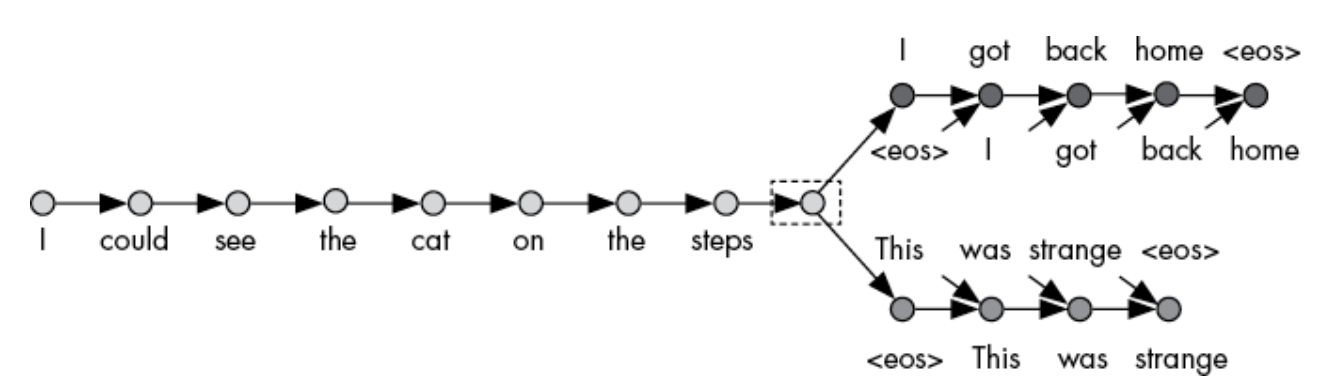
Source: https://arxiv.org/pdf/1506.06726.pdf

“Universal Sentence Encoder (USE). This tool converts sentences into vectors, using the idea of skip-thoughts to find the vectors (plus other advanced technical methods).”

In [14]:
Sentences = [
    "The trouble with having an open mind, of course, is that people will insist on coming along and trying to put things in it.",\
    "The problem with having an open mind is that people will insist on approaching and trying to insert things into your mind.",\
    "To be or not to be, that is the question",\
    "Call me Ishmael"
]

*Ended USE example due to issues with using tensorflow_hub module

## Other Application of NLP

- Content-Based Recommendation System
- Sentiment Analysis
- Chatbots